# Exploratory Analysis of Children's Literature Over Time

## Import Nessecary Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline

import numpy as np

Read in Dataset

In [2]:
df = pd.read_csv("dataset_new.csv")

Convert Publication Dates to numeric values over time

In [3]:
df['Data Published'] = pd.to_numeric(df['Data Published'].str.extract('(\d{4})')[0], errors='coerce')

Sort Data by Year

In [4]:
df = df.sort_values(by='Data Published')

Function to smooth lines

In [ ]:
def smooth_line(x, y, num_points=300):
    x_new = np.linspace(x.min(), x.max(), num_points)
    y_smooth = make_interp_spline(x, y)(x_new)
    return x_new, y_smooth

Drop missing values and Drop Duplicates

In [11]:
df = df.dropna(subset=['Data Published', 'Polarity', 'Subjectivity'])

Polarity and Subjectivity by Book Title

<Figure size 1200x800 with 0 Axes>

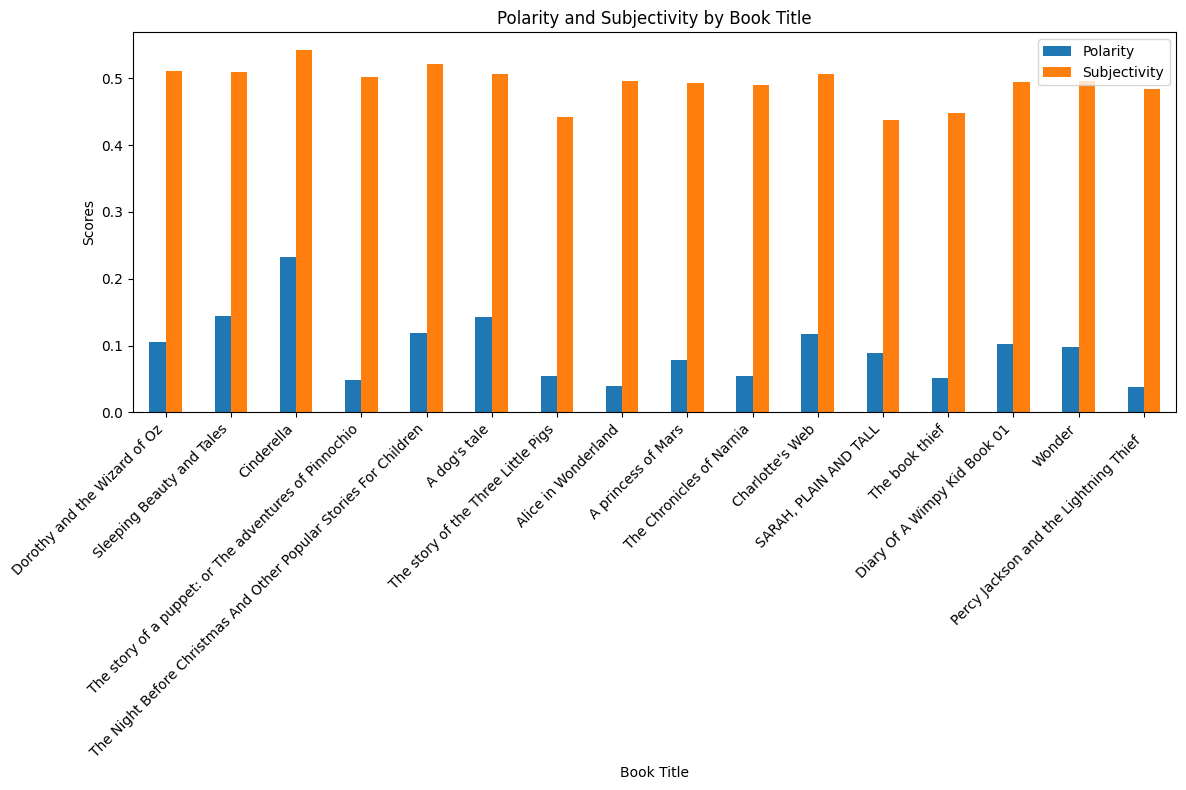

In [12]:
plt.figure(figsize=(12, 8))
df.plot(kind='bar', x='Book Title', y=['Polarity', 'Subjectivity'], figsize=(12, 8))
plt.title("Polarity and Subjectivity by Book Title")
plt.ylabel("Scores")
plt.xlabel("Book Title")
plt.xticks(rotation=45, ha='right')
plt.legend(["Polarity", "Subjectivity"])
plt.tight_layout()
plt.show()

Polarity over time

<Figure size 1200x800 with 0 Axes>

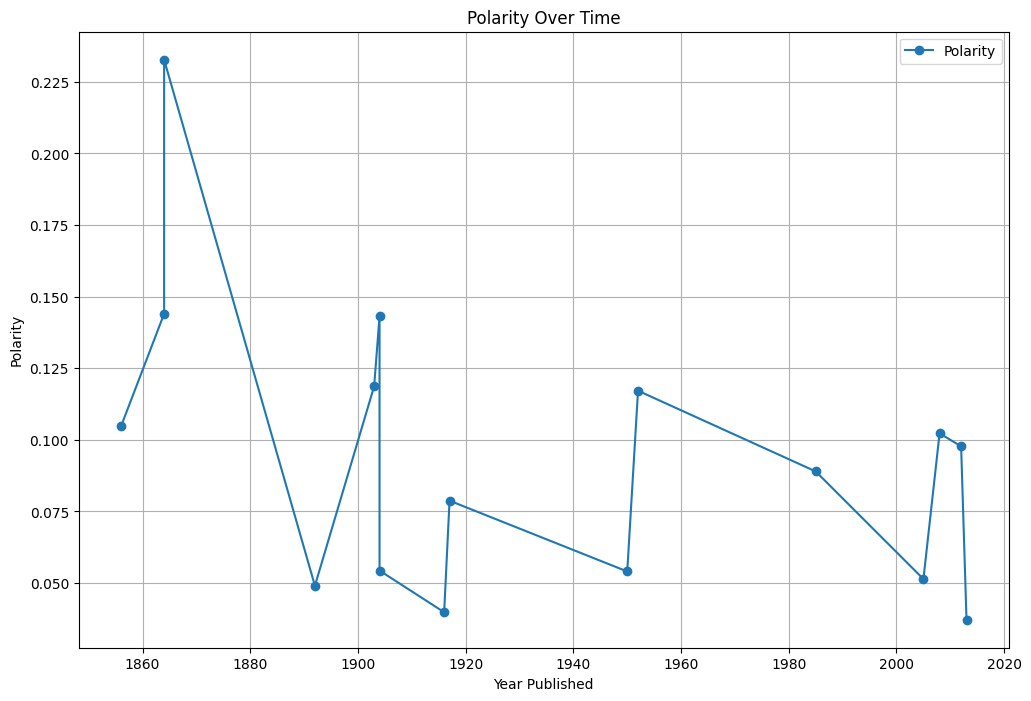

In [15]:
plt.figure(figsize=(12, 8))
df.dropna(subset=['Data Published']).plot(kind='line', x='Data Published', y='Polarity', marker='o', figsize=(12, 8))
plt.title("Polarity Over Time")
plt.ylabel("Polarity")
plt.xlabel("Year Published")
plt.grid()
plt.show()

Subjectivity over time

<Figure size 1200x800 with 0 Axes>

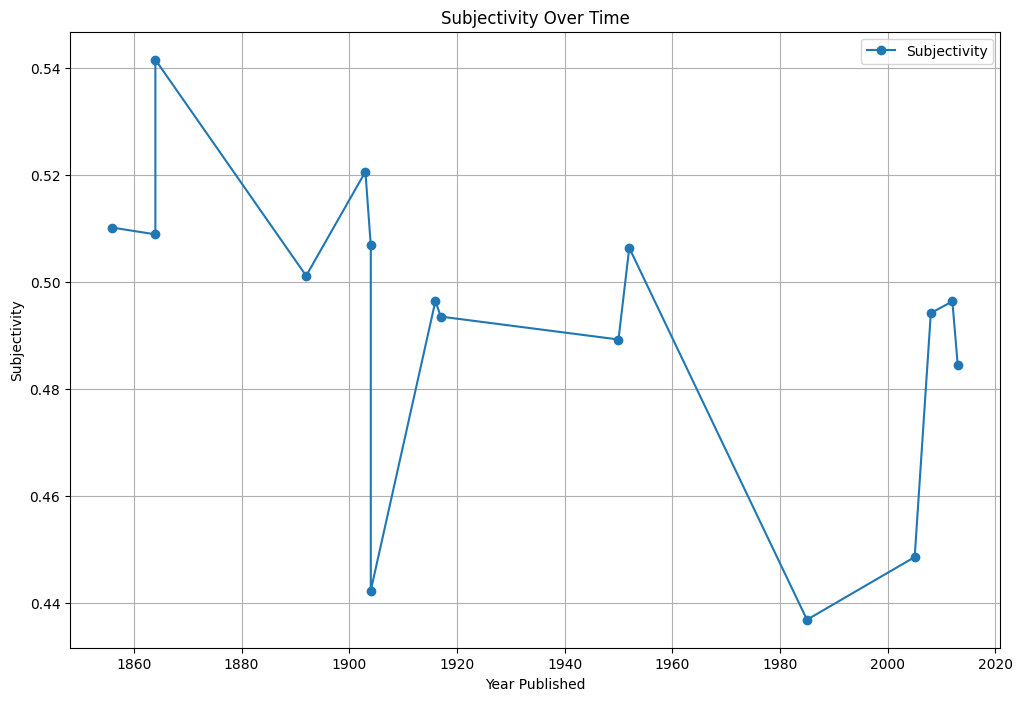

In [16]:
plt.figure(figsize=(12, 8))
df.dropna(subset=['Data Published']).plot(kind='line', x='Data Published', y='Subjectivity', marker='o', figsize=(12, 8))
plt.title("Subjectivity Over Time")
plt.ylabel("Subjectivity")
plt.xlabel("Year Published")
plt.grid()
plt.show()